# Auction experiment

Change the auction method or the valuation function below and re-run the cells to see how allocation changes.

In [1]:
import os
os.chdir('../')  # Change to the parent directory

from typing import List

from sim.ad_auction import AdSpot, Bidder

# Auction parameters
method = 'gsp'  # choose from 'first_price', 'second_price', 'gsp'
n_impressions = 200000
seed = 97
positive_bidder = 'STEM'  # bidder treated as the positive/high-stakes outcome

# Configure bidder valuations (bids) per group; edit these dictionaries as desired
BIDDER_TARGETING = {
    'Makeup': {'female': 10.0, 'male': 2.0},
    'STEM': {'female': 5.0, 'male': 0.2},
}

# Configure ad quality scores per group and bidder (used as CTR proxies)
QUALITY_BY_GROUP = {
    'female': {'Makeup': 0.5, 'STEM': 1.0},
    'male': {'Makeup': 0.1, 'STEM': 1.0},
}

# You can replace custom_valuation's body with your own function
def custom_valuation(bidder: Bidder, adspot: AdSpot, ctrs: List[float]) -> float:
    return bidder.targeting.get(adspot.tags[0], 0.0)


In [2]:
# Run the simulation
from experiments.experiment_gender_allocation import run_simulations, print_summary
results = run_simulations(
    n_impressions=n_impressions,
    methods=[method],
    seed=seed,
    valuation_fn=custom_valuation,
    bidder_configs=BIDDER_TARGETING,
    quality_by_group=QUALITY_BY_GROUP,
    positive_bidder_name=positive_bidder,
)
print_summary(results)



Method: gsp
Total impressions: 200000
Average price per impression: 4.306
Total spend by bidder:
  STEM: 600016.00
  Makeup: 261227.20
Impressions for female: 100251
  Makeup: 50257 (50.13%)
  STEM: 49994 (49.87%)
Impressions for male: 99749
  STEM: 50038 (50.16%)
  Makeup: 49711 (49.84%)
Statistical parity (share receiving STEM):
  male: 50.16%
  female: 49.87%
  Max gap: 0.30%
Equality of opportunity (expected clicks captured):
  male: 50.13%
  female: 49.96%
  Max gap: 0.18%
Total platform utility (revenue): 861243.20


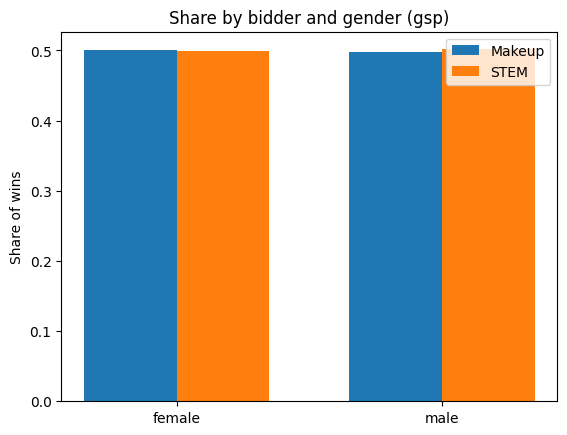

In [3]:
# Plot results inline (requires matplotlib)
from experiments.experiment_gender_allocation import try_plot
try_plot(results)


In [4]:
# Display fairness metrics at the end
for method_name, stats in results.items():
    print(f"Fairness metrics for {method_name}:")
    parity = stats["statistical_parity"]
    pos_bidder = parity.get('positive_bidder')
    if pos_bidder:
        print(f"  Statistical parity ({pos_bidder} exposure):")
    else:
        print("  Statistical parity (positive decision rate):")
    for group, rate in parity['per_group'].items():
        print(f"    {group}: {rate:.2%}")
    print(f"    Max gap: {parity['max_gap']:.2%}")
    opportunity = stats["equality_of_opportunity"]
    print("  Equality of opportunity (expected clicks captured):")
    for group, rate in opportunity['per_group'].items():
        print(f"    {group}: {rate:.2%}")
    print(f"    Max gap: {opportunity['max_gap']:.2%}")
    print(f"  Total platform utility: {stats['total_utility']:.2f}")
    print()


Fairness metrics for gsp:
  Statistical parity (STEM exposure):
    male: 50.16%
    female: 49.87%
    Max gap: 0.30%
  Equality of opportunity (expected clicks captured):
    male: 50.13%
    female: 49.96%
    Max gap: 0.18%
  Total platform utility: 861243.20

